# How To Find Datasets (World Bank Open Data, Registry of Open Data on AWS (RODA), Kaggle, Google Datasets, UCI, KDNuggets etc.)

### freeCodeCamp
https://github.com/freeCodeCamp/open-data

### FiveThirtyEight
https://data.fivethirtyeight.com/ 

### Data.gov
https://www.data.gov/

### DBpedia
https://www.dbpedia.org/

### UNICEF Data
https://data.unicef.org/

### Google Public Data
https://www.google.com/publicdata/directory

### Registry of Open Data on AWS (RODA)
https://registry.opendata.aws/

### Kaggle
https://www.kaggle.com/datasets

### UCI
https://archive.ics.uci.edu/ml/index.php

### KDNuggets
https://www.kdnuggets.com/



# Data's Statistical Journey

### Importing All Relevant Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Create simple and custom Dataset
Dataset is an object that holds our data as row and columns. This allows us to store, manipulate and prepare our data for analysis or for our ML model.

You can create a dataset with Pandas library. To do that, you should use DataFrame method of Pandas library which takes container types such as lists or dictionary as input. It also supports to indicate custom column names for data if needed or desired.

Let's create a Dataset that has a hundred students in it. Each student has a gender, faculty, GPA, and Id.

In [2]:
# Creating a dictionary to store all of the generated values together
dictionary_form = {'gender': np.random.choice(["female", "male"], 100),  # this creates a list which has a hundred randomly selected female and males in it                
                   'faculty': np.random.choice(["COE", "EEE", "IE"], 100), # this creates a list which has a hundred randomly selected COE, EEE and IE's in it
                   'gpa': np.random.uniform(0, 4, 100),  # this creates a list which has a hundred randomly selected float values between 0 and 4
                   'id': np.random.randint(1000000, 9999999, 100)}  # this creates a list which has a hundred randomly selected integer values between 1000000 and 9999999


In [3]:
# Converting the Dictionary to Dataframe format to be read by Pandas
dataframe_form = pd.DataFrame(dictionary_form)
dataframe_form.head()  # head method displays first 5 row of the dataframe

,gender,faculty,gpa,id
0,female,COE,2.579483,8111042
1,female,COE,0.054040,2262069
2,male,IE,1.594243,6566204
3,female,IE,2.080640,3237610
4,male,COE,2.439720,6425773


### Exploratory Data Analysis (EDA) with Pandas

---


There are several information gathering methods in pandas.
- df.head() is for viewing the top of the dataframe
- df.tail() is for viewing the bottom of the dataframe
- df.info() is for printing the column datatypes, non-null values and memory usage of the dataframe
- df.columns is for access the column names
- df.shape is for access the row and column counts
- df.size is for access the cell count 

In [4]:
dataframe_form.tail(7)  # tail(n) method displays last n row of the dataframe

,gender,faculty,gpa,id
93,male,EEE,1.097751,4656570
94,male,EEE,1.925475,7007629
95,female,EEE,1.724849,1247864
96,male,IE,3.681334,3534231
97,male,EEE,1.851001,9881243
98,female,COE,2.947454,6787971
99,male,COE,0.920918,1245115


In [5]:
dataframe_form.info()  # info method prints information of dtype and columns, non-null values and memory usage of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gender   100 non-null    object 
 1   faculty  100 non-null    object 
 2   gpa      100 non-null    float64
 3   id       100 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ KB


In [6]:
dataframe_form.columns

Index(['gender', 'faculty', 'gpa', 'id'], dtype='object')

In [7]:
dataframe_form.shape  # (row count, column count)

(100, 4)

In [8]:
dataframe_form.size  # row count times column count

400

#### Column data type conversions
* df.select_dtypes() method gets a parameter dtype and gathers all columns that have that dtype
* df[column_name].astype() method gets a parameter dtype and converts all value to the given dtype
- [!] Warning: Conversion errors in python are valid for astype method. For example, if there is a cell in a column that has a letter in it, it causes an error to convert that column to integer or float.

In [9]:
# Possible error due to conversion
dataframe_form['faculty'] = dataframe_form['faculty'].astype('float64')

ValueError: ignored

In [10]:
# Covert objects to categorical variables
object_columns = dataframe_form.select_dtypes("object").columns  #  select_dtypes method selects columns that has given dtype, columns returns selected columns as list


for colname in object_columns:  # iterate all columns in list
    dataframe_form[colname] = dataframe_form[colname].astype('category')  # astype method converts the selected column dtype to the given dtype

# Check it worked
dataframe_form.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   gender   100 non-null    category
 1   faculty  100 non-null    category
 2   gpa      100 non-null    float64 
 3   id       100 non-null    int64   
dtypes: category(2), float64(1), int64(1)
memory usage: 2.1 KB


#### Pandas Column Specifiers
- df.iloc[]
- df.loc[]

In [11]:
# Display the genders of the all students
dataframe_form["gender"]

0     female
1     female
2       male
3     female
4       male
       ...  
95    female
96      male
97      male
98    female
99      male
Name: gender, Length: 100, dtype: category
Categories (2, object): ['female', 'male']

In [12]:
# Display the faculities of the all students
dataframe_form["faculty"]

0     COE
1     COE
2      IE
3      IE
4     COE
     ... 
95    EEE
96     IE
97    EEE
98    COE
99    COE
Name: faculty, Length: 100, dtype: category
Categories (3, object): ['COE', 'EEE', 'IE']

In [13]:
# Display the GPA's of the all students
dataframe_form["gpa"]

0     2.579483
1     0.054040
2     1.594243
3     2.080640
4     2.439720
        ...   
95    1.724849
96    3.681334
97    1.851001
98    2.947454
99    0.920918
Name: gpa, Length: 100, dtype: float64

##### loc

In [14]:
'''
loc method gets [index, column] and lists them. 
Get the faculty of students that has index between 30-50
'''
dataframe_form.loc[30:50, "faculty"]  

30    COE
31    EEE
32     IE
33    COE
34    COE
35    COE
36     IE
37     IE
38    COE
39    EEE
40    COE
41     IE
42    EEE
43    EEE
44    COE
45    EEE
46    EEE
47    EEE
48     IE
49     IE
50    COE
Name: faculty, dtype: category
Categories (3, object): ['COE', 'EEE', 'IE']

##### iloc

In [15]:
'''
iloc method gets [index] and lists them. 
Get the faculty of students that has numeric index between 30-50
'''
dataframe_form.iloc[30:50]

,gender,faculty,gpa,id
30,male,COE,1.686050,2964386
31,male,EEE,3.277033,6596524
32,male,IE,1.218293,7697410
33,female,COE,1.244268,1207680
34,male,COE,0.987055,6059730
35,female,COE,3.461063,4692642
36,female,IE,3.466477,8099541
37,female,IE,2.323067,5280968
38,male,COE,0.626564,1763251
39,male,EEE,1.503089,3636046


#### Grouping DataFrame  

df.groupby() method involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups.

In [16]:
faculty_groups = dataframe_form.groupby("faculty")
faculty_groups["gender"].value_counts()  # value_counts method displays the counts of the given column by a group

faculty  gender
COE      male      16
         female    14
EEE      female    20
         male      14
IE       male      20
         female    16
Name: gender, dtype: int64

In [17]:
faculty_groups["gpa"].mean()

faculty
COE    1.509627
EEE    2.162970
IE     1.997880
Name: gpa, dtype: float64

In [18]:
#You can group the data by multiple columns (order should be considered)
faculty_gender_groups = dataframe_form.groupby(["faculty", "gender"])

In [19]:
faculty_gender_groups["gpa"].mean()

faculty  gender
COE      female    1.955542
         male      1.119451
EEE      female    2.291835
         male      1.978877
IE       female    2.188356
         male      1.845498
Name: gpa, dtype: float64

In [20]:
gender_faculty_groups = dataframe_form.groupby(["gender", "faculty"])

In [21]:
gender_faculty_groups["gpa"].mean()

gender  faculty
female  COE        1.955542
        EEE        2.291835
        IE         2.188356
male    COE        1.119451
        EEE        1.978877
        IE         1.845498
Name: gpa, dtype: float64


#### Simple Visualization with Matplotlib


Visualization is one of the most important and fundamental phase of the EDA since it helps us to understand and interpret the data regardless of it's size.

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
male = dataframe_form.loc[dataframe_form["gender"] == "male"]  # locate the rows where gender equals male in dataframe
female = dataframe_form.loc[dataframe_form["gender"] == "female"]  # locate the rows where gender equals female in dataframe

Text(0, 0.5, 'GPA')

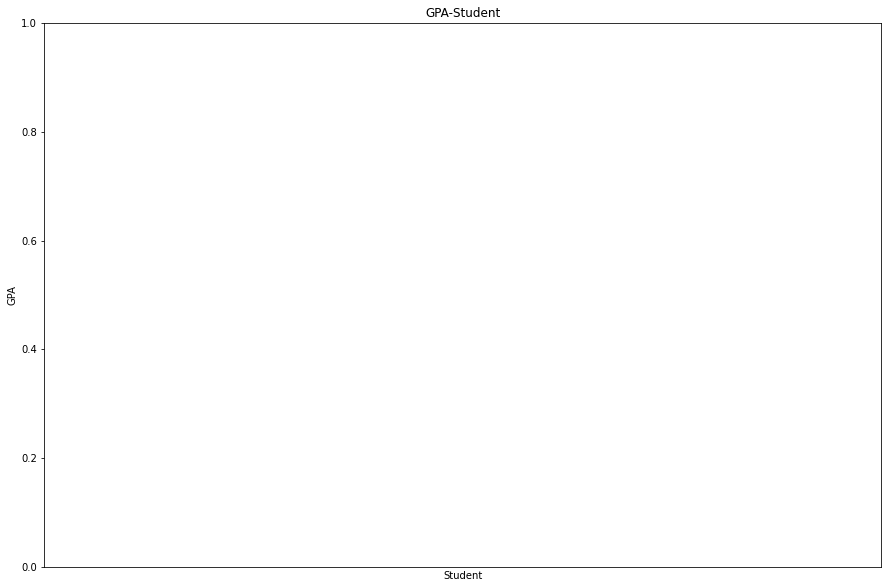

In [24]:
# Configure plot settings
plt.figure(figsize=(15,10))
plt.xticks([])
plt.title("GPA-Student")
plt.xlabel("Student")
plt.ylabel("GPA")

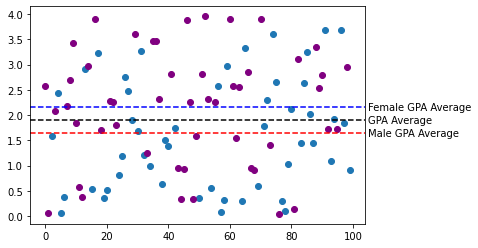

In [25]:
# Plot Female and Male GPA's
plt.scatter(male.index, male["gpa"])
plt.scatter(female.index, female["gpa"], color="purple")

# mean method calculates the mean of a given column
# Draw means of GPA's of all students
plt.axhline(dataframe_form["gpa"].mean(), linestyle ="dashed", color="black")
plt.text(105, dataframe_form["gpa"].mean(), 'GPA Average', ha="left", va="center")

# Draw means of GPA's of Male students
plt.axhline(female["gpa"].mean(), linestyle ="dashed", color="blue")
plt.text(105, female["gpa"].mean(), 'Female GPA Average', ha="left", va="center")

# Draw means of GPA's of Female students
plt.axhline(male["gpa"].mean(), linestyle ="dashed", color="red")
plt.text(105, male["gpa"].mean(), 'Male GPA Average', ha="left", va="center")
plt.show()

In [26]:
# Let's create a new data frame with more columns (Gender, Id, and 6 lessons)

dictionary_form = {'Gender': np.random.choice(["female", "male"], 100),
                  'Data Structures': np.random.randint(0, 100, 100),
                  'Linear Algebra': np.random.randint(0, 100, 100),
                  'Advanced Programming': np.random.randint(0, 100, 100),
                  'Database Systems': np.random.randint(0, 100, 100),
                  'Cyber Security': np.random.randint(0, 100, 100),
                  'Computer Vision': np.random.randint(0, 100, 100),
                  'ID':np.random.randint(1000000, 9999999, 100)}

In [27]:
# Converting the Dictionary to Dataframe format to be read by Pandas
df = pd.DataFrame(dictionary_form)
df.head()

,Gender,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,ID
0,female,51,32,73,13,54,43,5608667
1,female,46,54,95,86,8,35,6326158
2,male,67,40,70,65,72,87,1791496
3,male,90,56,61,78,41,71,1413789
4,male,78,23,21,93,96,69,4743306


In [28]:
'''
describe method prints count, mean, standart deviation, min, 
quartiles of the all possible (numerical) columns 
'''
df.describe()

,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,ID
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,52.300000,51.100000,48.590000,53.960000,48.030000,51.030000,5.087071e+06
std,29.250054,28.772356,30.285208,28.797769,28.093083,28.583196,2.675046e+06
min,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,1.013922e+06
25%,25.750000,23.750000,22.000000,29.500000,25.750000,28.500000,2.845868e+06
50%,51.000000,49.000000,48.000000,55.500000,50.000000,53.500000,4.746238e+06
75%,76.000000,75.250000,75.000000,78.250000,70.250000,77.500000,7.290041e+06
max,99.000000,99.000000,99.000000,97.000000,96.000000,99.000000,9.994406e+06


In [29]:
'''
# T instance takes the transpose of the matrix and in some situations this can 
be helpful for better understanding 
'''
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Data Structures,100.0,52.30,2.925005e+01,0.0,25.75,51.0,76.00,99.0
Linear Algebra,100.0,51.10,2.877236e+01,0.0,23.75,49.0,75.25,99.0
Advanced Programming,100.0,48.59,3.028521e+01,0.0,22.00,48.0,75.00,99.0
Database Systems,100.0,53.96,2.879777e+01,3.0,29.50,55.5,78.25,97.0
Cyber Security,100.0,48.03,2.809308e+01,0.0,25.75,50.0,70.25,96.0
Computer Vision,100.0,51.03,2.858320e+01,1.0,28.50,53.5,77.50,99.0
ID,100.0,5087070.95,2.675046e+06,1013922.0,2845868.25,4746238.0,7290041.25,9994406.0


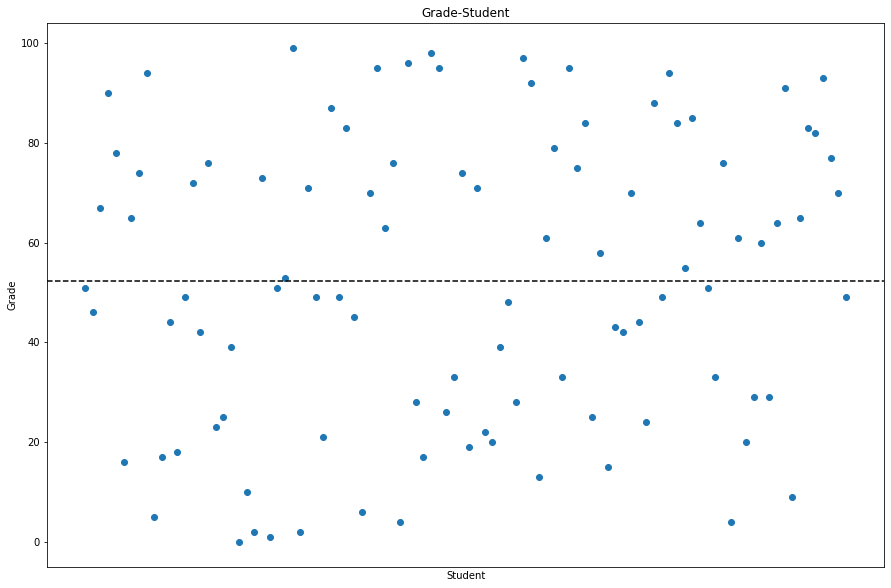

In [30]:
# Configure plot settings
plt.figure(figsize=(15,10))
plt.xticks([])
plt.title("Grade-Student")
plt.xlabel("Student")
plt.ylabel("Grade")

# Plot grades
plt.scatter(df["Data Structures"].index, df["Data Structures"])

# Draw mean line
plt.axhline(df["Data Structures"].mean(), linestyle ="dashed", color="black")
plt.show()

#### Mathematical Operations with Pandas

 Let's apply curve to the Data Structures and Linear Algebra lessons

In [31]:
print(df["Data Structures"].mean())
print(df["Linear Algebra"].mean())

52.3
51.1


In [32]:
# We know that the mean of the lessons are less then 60, however it's good to add a condition to check it
df_columns = ["Data Structures","Linear Algebra"]

for col in df_columns:
  if df[col].mean() < 60:  # if mean of the lesson is less than 60
    df[col] = df[col] + (60-df[col].mean())  # add 60 - mean to all students' grades
    df.loc[df[col] > 100, col] = 100  # if there is any student' grade is more than 100, equalize it to 100

In [33]:
print(df["Data Structures"].mean())
print(df["Linear Algebra"].mean())

# New means are nearly 60. The reason that it is not equal to 60 is that equalizing the grades of the students who have more than a hundred to a hundred

59.669999999999916
59.50899999999993


In [34]:
passed_students = df.loc[df["Data Structures"] >= 59.5, "Data Structures"]  # get the students who passed the class (grade > 59.5)

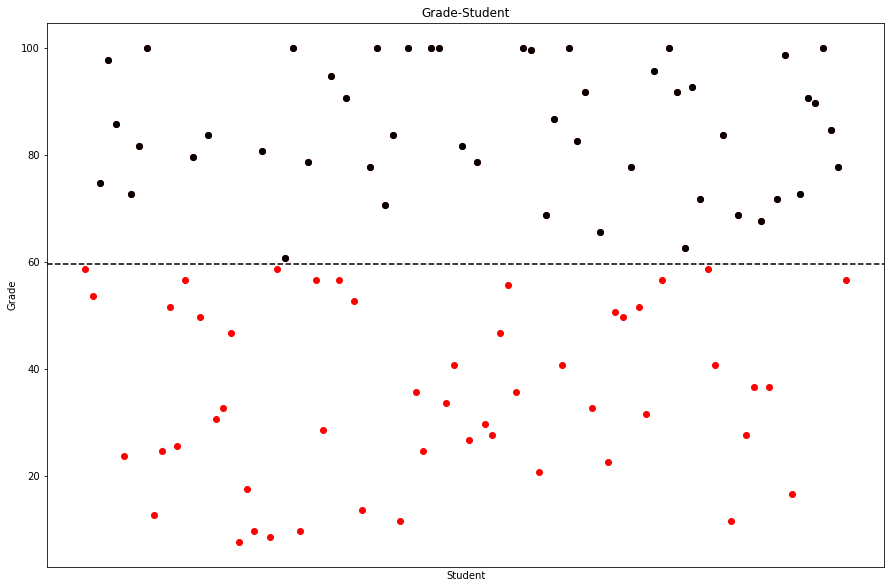

In [35]:
# Configure plot settings
plt.figure(figsize=(15,10))
plt.xticks([])
plt.title("Grade-Student")
plt.xlabel("Student")
plt.ylabel("Grade")

# Plot grades
plt.scatter(df["Data Structures"].index,df["Data Structures"], color="red")  # draw all students with red
plt.scatter(passed_students.index,passed_students, color="black")  # redraw the passed students with black

# Draw mean line
plt.axhline(df["Data Structures"].mean(), linestyle="dashed", color="black")
plt.show()

#### Mean, Min, Max, Variance and Standard Deviation

In [36]:
# Mean, min, max, standard deviation
df["Data Structures"].mean(), df["Data Structures"].min(), df["Data Structures"].max(), df["Data Structures"].var(), df["Data Structures"].std(), df["Data Structures"].mode()

(59.669999999999916,
 7.700000000000003,
 100.0,
 827.3617171717173,
 28.763896070798847,
 0    100.0
 dtype: float64)

#### Useful Pandas Methods

##### df.stack()
Converts columns to indexes

In [37]:
stacked_df = df.stack()
stacked_df

0   Gender                   female
    Data Structures            58.7
    Linear Algebra             40.9
    Advanced Programming         73
    Database Systems             13
                             ...   
99  Advanced Programming         93
    Database Systems              7
    Cyber Security               64
    Computer Vision              91
    ID                      2862257
Length: 800, dtype: object

In [38]:
print(df.columns)
stacked_df[0].index

Index(['Gender', 'Data Structures', 'Linear Algebra', 'Advanced Programming',
       'Database Systems', 'Cyber Security', 'Computer Vision', 'ID'],
      dtype='object')


Index(['Gender', 'Data Structures', 'Linear Algebra', 'Advanced Programming',
       'Database Systems', 'Cyber Security', 'Computer Vision', 'ID'],
      dtype='object')

In [39]:
'''
np.where returns indexes that are the same as the given parameter 
here we want the index of the ID column in the stacked dataframe
'''
np.where(stacked_df[0].index=="ID")  

(array([7]),)

In [40]:
# 7 is the index of the ID's
print(stacked_df[0][7] == df.loc[0,"ID"])  # stacked_df[0][7] returns the id of the first student df.loc[0,"ID"] is also returns the id of the first student

np.any([stacked_df[x][7] != df.loc[x,"ID"] for x in range(len(df)-1)]) # np.any returns true if there is at least one False value in the given list
# here we are checking that are there any not matched id with df and stacked_df, False means all Id's are matched 

True


False

Let's calculate mean, variance and standard deviation manually with help of stack

In [41]:
# Manual mean calculation
summ = 0
for i in range(len(stacked_df)//len(stacked_df[0])):
  summ += stacked_df[i]["Data Structures"]  # sum the all grades
  
mean = summ/df["Data Structures"].shape[0]  #  divide it by the student count
mean

59.669999999999916

In [42]:
# Manual variance and standard deviation calculation
summ = 0
for i in range(len(stacked_df)//len(stacked_df[0])):
  summ += (stacked_df[i]["Data Structures"] - mean)**2  # sum the square of the all grades

variance = summ/df["Data Structures"].shape[0]  # divide the sum by student count, this is variance
std = variance**0.5  # square root of variance equals to standard deviation

variance, std

(819.0881000000002, 28.61971523268532)

In [43]:
df["Data Structures"].var(ddof=0) == variance   # Check if it's true  

True

In [44]:
df["Data Structures"].std(ddof=0) == std  # Check if it's true  

True

In [45]:
stacked_df.unstack()  # unstack converts a stacked dataframe to its original state

,Gender,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,ID
0,female,58.7,40.9,73,13,54,43,5608667
1,female,53.7,62.9,95,86,8,35,6326158
2,male,74.7,48.9,70,65,72,87,1791496
3,male,97.7,64.9,61,78,41,71,1413789
4,male,85.7,31.9,21,93,96,69,4743306
...,...,...,...,...,...,...,...,...
95,female,89.7,33.9,48,83,30,4,1241225
96,female,100,15.9,86,51,79,55,2694355
97,female,84.7,100,73,74,5,30,1876635
98,female,77.7,13.9,46,28,70,85,7281817


##### pd.melt()


melt() breaks down the columns into row values

In [46]:
melted_df = pd.melt(df, id_vars=["Gender"], value_vars=["Data Structures", "Linear Algebra"])
melted_df

,Gender,variable,value
0,female,Data Structures,58.7
1,female,Data Structures,53.7
2,male,Data Structures,74.7
3,male,Data Structures,97.7
4,male,Data Structures,85.7
...,...,...,...
195,female,Linear Algebra,33.9
196,female,Linear Algebra,15.9
197,female,Linear Algebra,100.0
198,female,Linear Algebra,13.9


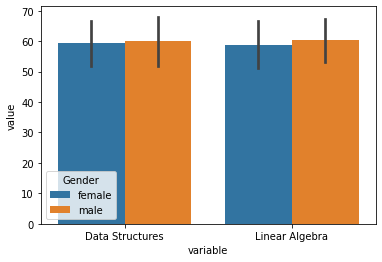

In [47]:
'''
it can be written as x="variable" means "Gender" and y="value" means "Data Structures" and "Linear Algebra" 
thanks to the melt we couldn't get that visualization without melt method
'''
sns.barplot(data=melted_df, x="variable", y="value", hue="Gender")  

##### df.drop()

drop method drops the given column(s) for given axis

- axis = 0 -> Row based
- axis = 1 -> Columns based

since inplace=False in drop method, we don't lose the data from original one

![WARNING]: if its used with inplace=True; it returns nothing and drops the column(s) from the original dataset which is df in our scenario

In [48]:
gender_dropped = df.drop("Gender", axis=1, inplace=False)  
gender_dropped

,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,ID
0,58.7,40.9,73,13,54,43,5608667
1,53.7,62.9,95,86,8,35,6326158
2,74.7,48.9,70,65,72,87,1791496
3,97.7,64.9,61,78,41,71,1413789
4,85.7,31.9,21,93,96,69,4743306
...,...,...,...,...,...,...,...
95,89.7,33.9,48,83,30,4,1241225
96,100.0,15.9,86,51,79,55,2694355
97,84.7,100.0,73,74,5,30,1876635
98,77.7,13.9,46,28,70,85,7281817


In [49]:
df

,Gender,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,ID
0,female,58.7,40.9,73,13,54,43,5608667
1,female,53.7,62.9,95,86,8,35,6326158
2,male,74.7,48.9,70,65,72,87,1791496
3,male,97.7,64.9,61,78,41,71,1413789
4,male,85.7,31.9,21,93,96,69,4743306
...,...,...,...,...,...,...,...,...
95,female,89.7,33.9,48,83,30,4,1241225
96,female,100.0,15.9,86,51,79,55,2694355
97,female,84.7,100.0,73,74,5,30,1876635
98,female,77.7,13.9,46,28,70,85,7281817


##### Adding New Columns
You can add new column by specifying column name as indexing and assigning value to it as shown below. 

Let's add a new lesson to our dataset for example.

In [50]:
df

,Gender,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,ID
0,female,58.7,40.9,73,13,54,43,5608667
1,female,53.7,62.9,95,86,8,35,6326158
2,male,74.7,48.9,70,65,72,87,1791496
3,male,97.7,64.9,61,78,41,71,1413789
4,male,85.7,31.9,21,93,96,69,4743306
...,...,...,...,...,...,...,...,...
95,female,89.7,33.9,48,83,30,4,1241225
96,female,100.0,15.9,86,51,79,55,2694355
97,female,84.7,100.0,73,74,5,30,1876635
98,female,77.7,13.9,46,28,70,85,7281817


In [51]:
df.shape

(100, 8)

In [52]:
'''
add randomly generated "df.shape[0]" (100) piece of integer between 0 and 100
'''
df["Ethics"] = np.random.randint(0, 100, df.shape[0])
df

,Gender,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,ID,Ethics
0,female,58.7,40.9,73,13,54,43,5608667,98
1,female,53.7,62.9,95,86,8,35,6326158,99
2,male,74.7,48.9,70,65,72,87,1791496,36
3,male,97.7,64.9,61,78,41,71,1413789,99
4,male,85.7,31.9,21,93,96,69,4743306,46
...,...,...,...,...,...,...,...,...,...
95,female,89.7,33.9,48,83,30,4,1241225,39
96,female,100.0,15.9,86,51,79,55,2694355,31
97,female,84.7,100.0,73,74,5,30,1876635,96
98,female,77.7,13.9,46,28,70,85,7281817,44


In [53]:
df.shape

(100, 9)

##### df.reindex()

Reorders the current columns

In [54]:
'''
ID stuck between two lesson, let's change their order
We need a list of column names with desired order
'''
cols = df.columns.tolist()
cols[-1], cols[-2] = cols[-2], cols[-1]
cols

['Gender',
 'Data Structures',
 'Linear Algebra',
 'Advanced Programming',
 'Database Systems',
 'Cyber Security',
 'Computer Vision',
 'Ethics',
 'ID']

In [55]:
# Setting up new column order
df = df.reindex(cols,axis=1)
df

,Gender,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,Ethics,ID
0,female,58.7,40.9,73,13,54,43,98,5608667
1,female,53.7,62.9,95,86,8,35,99,6326158
2,male,74.7,48.9,70,65,72,87,36,1791496
3,male,97.7,64.9,61,78,41,71,99,1413789
4,male,85.7,31.9,21,93,96,69,46,4743306
...,...,...,...,...,...,...,...,...,...
95,female,89.7,33.9,48,83,30,4,39,1241225
96,female,100.0,15.9,86,51,79,55,31,2694355
97,female,84.7,100.0,73,74,5,30,96,1876635
98,female,77.7,13.9,46,28,70,85,44,7281817


##### df.append()

In [56]:
df

,Gender,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,Ethics,ID
0,female,58.7,40.9,73,13,54,43,98,5608667
1,female,53.7,62.9,95,86,8,35,99,6326158
2,male,74.7,48.9,70,65,72,87,36,1791496
3,male,97.7,64.9,61,78,41,71,99,1413789
4,male,85.7,31.9,21,93,96,69,46,4743306
...,...,...,...,...,...,...,...,...,...
95,female,89.7,33.9,48,83,30,4,39,1241225
96,female,100.0,15.9,86,51,79,55,31,2694355
97,female,84.7,100.0,73,74,5,30,96,1876635
98,female,77.7,13.9,46,28,70,85,44,7281817


In [57]:
'''
Append two more student to the dataset
![Warning] It has to be equalized to the dataframe while appending  
df = df.append(), there is no inplace parameter for append
'''
for i in range(2):
  df = df.append({'Gender': np.random.choice(["female","male"]),
                  'Data Structures': np.random.randint(0,100),
                  'Linear Algebra': np.random.randint(0,100),
                  'Advanced Programming': np.random.randint(0,100),
                  'Database Systems': np.random.randint(0,100),
                  'Cyber Security': np.random.randint(0,100),
                  'Computer Vision': np.random.randint(0,100),
                  'ID':np.random.randint(1000000,9999999)},ignore_index=True)


In [58]:
df.tail()
# we forget to add ethics lesson :(

,Gender,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,Ethics,ID
97,female,84.7,100.0,73,74,5,30,96.0,1876635
98,female,77.7,13.9,46,28,70,85,44.0,7281817
99,male,56.7,23.9,93,7,64,91,94.0,2862257
100,female,21.0,37.0,95,14,16,12,NaN,7752475
101,female,97.0,1.0,84,32,71,5,NaN,3574355


#### Handling Missing Values
In real life, data will not be perfectly balanced and full. To be honest, most of the data requires preprocessing before being analysed. This phase includes cleaning the outlier and missing value and many more.

For handling missing values which can be considered as NULL or NaN, we are using special methods provided us by Pandas itself which are 

- **isna():** isna method returns a list of True and False's for all cells in the dataframe.
- **dropna():** drops the nan values according to the given axis parameter



The difference between NULL & NaN:
(NULL values represents "no value" or "nothing", it's not even an empty string or zero. It can be used to represent that nothing useful exists.  

NaN stands for "Not a Number", it's usually the result of a mathematical operation that doesn't make sense, e.g. 0.0/0.0.)


In [59]:
''' 
sum method sums all the Trues in all columns which in this case, NaN columns will be True 
since we are using isna()
'''
df.isna().sum()  

Gender                  0
Data Structures         0
Linear Algebra          0
Advanced Programming    0
Database Systems        0
Cyber Security          0
Computer Vision         0
Ethics                  2
ID                      0
dtype: int64

In [60]:
df[df["Ethics"].isna()]  # print the rows which include nan

,Gender,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,Ethics,ID
100,female,21.0,37.0,95,14,16,12,NaN,7752475
101,female,97.0,1.0,84,32,71,5,NaN,3574355


In [61]:
'''
at method finds the given index and column and you can change that value by equalizing it to any value
 df.loc[100,"Ethics"] = np.random.randint(0,100) same with above
'''
df.at[100,"Ethics"] = np.random.randint(0, 100)
df.tail()

,Gender,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,Ethics,ID
97,female,84.7,100.0,73,74,5,30,96.0,1876635
98,female,77.7,13.9,46,28,70,85,44.0,7281817
99,male,56.7,23.9,93,7,64,91,94.0,2862257
100,female,21.0,37.0,95,14,16,12,41.0,7752475
101,female,97.0,1.0,84,32,71,5,NaN,3574355


In [62]:
df = df.dropna()  # dropna drops a row if there is any nan value in a spesific column
df.tail()

,Gender,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,Ethics,ID
96,female,100.0,15.9,86,51,79,55,31.0,2694355
97,female,84.7,100.0,73,74,5,30,96.0,1876635
98,female,77.7,13.9,46,28,70,85,44.0,7281817
99,male,56.7,23.9,93,7,64,91,94.0,2862257
100,female,21.0,37.0,95,14,16,12,41.0,7752475


In [63]:
# Create a new dataframe for 50 erasmus students 
dictionary_form = {'Gender': np.random.choice(["female", "male"], 50),
                   'Is Erasmus': True, 
                   'Data Structures': np.random.randint(0, 100, 50),
                   'Linear Algebra': np.random.randint(0, 100, 50),
                   'Advanced Programming': np.random.randint(0, 100, 50),
                   'Database Systems': np.random.randint(0, 100, 50),
                   'Cyber Security': np.random.randint(0, 100, 50),
                   'Computer Vision': np.random.randint(0, 100, 50),
                   'Ethics': np.random.randint(0, 100, 50),
                   'ID':np.random.randint(1000000, 9999999, 50)}

In [64]:
df_international = pd.DataFrame(dictionary_form)
df_international.head()

,Gender,Is Erasmus,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,Ethics,ID
0,female,True,89,64,20,52,90,42,85,3126607
1,male,True,51,7,98,24,65,24,18,8568696
2,female,True,54,42,66,1,75,7,23,6303484
3,male,True,29,52,95,16,63,27,28,3463355
4,female,True,78,24,43,16,26,29,47,7018356


In [65]:
df["Is Erasmus"] = False  # add a new column (Is Erasmus) to old dataframe which has a value False initially
df

,Gender,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,Ethics,ID,Is Erasmus
0,female,58.7,40.9,73,13,54,43,98.0,5608667,False
1,female,53.7,62.9,95,86,8,35,99.0,6326158,False
2,male,74.7,48.9,70,65,72,87,36.0,1791496,False
3,male,97.7,64.9,61,78,41,71,99.0,1413789,False
4,male,85.7,31.9,21,93,96,69,46.0,4743306,False
...,...,...,...,...,...,...,...,...,...,...
96,female,100.0,15.9,86,51,79,55,31.0,2694355,False
97,female,84.7,100.0,73,74,5,30,96.0,1876635,False
98,female,77.7,13.9,46,28,70,85,44.0,7281817,False
99,male,56.7,23.9,93,7,64,91,94.0,2862257,False


In [66]:
# Change the column order to replace Id and Is Erasmus columns
cols = df.columns.tolist()  # get columns as list
last_column = cols[-1]  # get Erasmus column
cols.pop(-1)  # remove it from list
cols.insert(1, last_column)  # insert it to first index
df = df.reindex(cols, axis=1)  # reindex the dataframe
df.head()

,Gender,Is Erasmus,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,Ethics,ID
0,female,False,58.7,40.9,73,13,54,43,98.0,5608667
1,female,False,53.7,62.9,95,86,8,35,99.0,6326158
2,male,False,74.7,48.9,70,65,72,87,36.0,1791496
3,male,False,97.7,64.9,61,78,41,71,99.0,1413789
4,male,False,85.7,31.9,21,93,96,69,46.0,4743306


pd.concat()

concat concatenates two or more datasets to create a new one

In [67]:
all_students = pd.concat([df, df_international], ignore_index=True)  # concat method gets different dataframes as list parameter and combines them together
all_students

,Gender,Is Erasmus,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,Ethics,ID
0,female,False,58.7,40.9,73,13,54,43,98.0,5608667
1,female,False,53.7,62.9,95,86,8,35,99.0,6326158
2,male,False,74.7,48.9,70,65,72,87,36.0,1791496
3,male,False,97.7,64.9,61,78,41,71,99.0,1413789
4,male,False,85.7,31.9,21,93,96,69,46.0,4743306
...,...,...,...,...,...,...,...,...,...,...
146,male,True,89.0,68.0,52,95,73,42,91.0,4767687
147,female,True,40.0,24.0,74,46,69,83,73.0,7467731
148,female,True,84.0,27.0,95,7,92,63,57.0,4219759
149,male,True,68.0,93.0,8,58,84,99,77.0,3467021


##### df.drop_duplicates()

drop_duplicates method drops the duplicated rows. It can be given subset parameter to check spesific columns

In [68]:
'''
duplicated method return a true false list which compares all cells one by one and 
if it is used for index spesifier on the dataset, it can be seen the duplicated indexes
'''
all_students[all_students.duplicated()]

,Gender,Is Erasmus,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,Ethics,ID


In [69]:
# If there is no duplicated rows, then we can create a duplicate by appending the last row
all_students = all_students.append(all_students.iloc[len(all_students)-1], ignore_index=True, verify_integrity=False)  
# verify_integrity checks if the appending row is duplicated
all_students.tail()

,Gender,Is Erasmus,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,Ethics,ID
147,female,True,40.0,24.0,74,46,69,83,73.0,7467731
148,female,True,84.0,27.0,95,7,92,63,57.0,4219759
149,male,True,68.0,93.0,8,58,84,99,77.0,3467021
150,male,True,2.0,1.0,67,85,69,97,86.0,9526495
151,male,True,2.0,1.0,67,85,69,97,86.0,9526495


In [70]:
all_students[all_students.duplicated()] # here it can be seen the duplicated row

,Gender,Is Erasmus,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,Ethics,ID
151,male,True,2.0,1.0,67,85,69,97,86.0,9526495


In [71]:
all_students.drop_duplicates(keep="first") 

,Gender,Is Erasmus,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,Ethics,ID
0,female,False,58.7,40.9,73,13,54,43,98.0,5608667
1,female,False,53.7,62.9,95,86,8,35,99.0,6326158
2,male,False,74.7,48.9,70,65,72,87,36.0,1791496
3,male,False,97.7,64.9,61,78,41,71,99.0,1413789
4,male,False,85.7,31.9,21,93,96,69,46.0,4743306
...,...,...,...,...,...,...,...,...,...,...
146,male,True,89.0,68.0,52,95,73,42,91.0,4767687
147,female,True,40.0,24.0,74,46,69,83,73.0,7467731
148,female,True,84.0,27.0,95,7,92,63,57.0,4219759
149,male,True,68.0,93.0,8,58,84,99,77.0,3467021


##### df.sort_values()

sort_values method reorders the dataframe by sorting the column values on the given parameter

In [72]:
all_students = all_students.sort_values(by='ID', ascending=True)
all_students

,Gender,Is Erasmus,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,Ethics,ID
17,male,False,30.7,30.9,6,46,9,50,99.0,1013922
56,male,False,35.7,100.0,89,80,38,62,46.0,1039780
81,male,False,58.7,75.9,83,85,57,85,52.0,1124809
139,male,True,43.0,46.0,13,40,31,1,46.0,1145417
27,female,False,100.0,12.9,27,51,43,19,69.0,1219828
...,...,...,...,...,...,...,...,...,...,...
131,female,True,52.0,13.0,46,90,90,75,15.0,9805883
120,female,True,30.0,94.0,27,88,96,4,1.0,9834145
112,female,True,46.0,5.0,10,58,58,6,96.0,9924346
55,female,False,55.7,100.0,36,18,32,84,44.0,9966026


##### df.set_index()

set index methods removes the current indexing and replaces it with the given column which can be considered as new index

In [73]:
all_students = all_students.set_index("ID")
all_students

,Gender,Is Erasmus,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,Ethics
ID,,,,,,,,,
1013922,male,False,30.7,30.9,6,46,9,50,99.0
1039780,male,False,35.7,100.0,89,80,38,62,46.0
1124809,male,False,58.7,75.9,83,85,57,85,52.0
1145417,male,True,43.0,46.0,13,40,31,1,46.0
1219828,female,False,100.0,12.9,27,51,43,19,69.0
...,...,...,...,...,...,...,...,...,...
9805883,female,True,52.0,13.0,46,90,90,75,15.0
9834145,female,True,30.0,94.0,27,88,96,4,1.0
9924346,female,True,46.0,5.0,10,58,58,6,96.0


### Let's create a csv file for Data Structures' instructor


In [74]:
# Drop all other lessons
data_structures_students = all_students.drop(["Linear Algebra",
                                              "Advanced Programming",
                                              "Database Systems",
                                              "Cyber Security", 
                                              "Computer Vision", 
                                              "Ethics"], 
                                             axis=1)

In [75]:
data_structures_students.head()

,Gender,Is Erasmus,Data Structures
ID,,,
1013922,male,False,30.7
1039780,male,False,35.7
1124809,male,False,58.7
1145417,male,True,43.0
1219828,female,False,100.0


#### df.to_csv()

In [76]:
data_structures_students.to_csv("Data_Structures_Students.csv")  # save dataframe as a csv file